## OASIS Dataset Analysis

I wanted to try out some analysis using a freely available longitudinal dataset containing older participants from Kaggle. https://www.kaggle.com/jboysen/mri-and-alzheimers


### Information about the data

The data comes from a project titled "Open Access Series of Imaging Studies (OASIS): Longitudinal MRI Data in Nondemented and Demented Older Adults" by Marcus and colleagues. Participants were taken from a longitudinal pool of the Washington University Alzheimer Disease Research Center (ADRC). There were 150 participants with ages ranging from 60 to 96 years and various measures were taken such as T1-weighted MRI scans, brain volume measure and cognitive tests. These scans were taken at least one year apart with participants having two or more visits each. There were 72 participants that did not have dementia throughout the study, 64 had dementia from baseline including with 51 diagnosed as having mild to moderate Alzheimer's disease and 14 did not have dementia at baseline but were diagnosed with dementia later in the study. 

Link to the original paper
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2895005/

### Columns
* Subject ID  
* MRI ID 
* Group - Demented, Non-demented or Converted
* Visit - ordinality of visit 1st, 2nd,... 5th
* MR Delay - number of days between two medical visits
* M/F - Sex
* Hand - Handedness, all were right-handed
* Age - in years 
* EDUC - years of education 
* SES - social economic status 
* MMSE - Mini Mental State Examination score from 0-30, scores of 24 or more indicate normal cognition
* CDR - Clinical Dementia Rating 
* eTIV - Estimated total intracranial volume
* nWBV - Normalized whole-brain volume
* ASF - Atlas scaling factor

In [1]:
import pandas as pd

In [2]:
oasis_df = pd.read_csv('oasis_longitudinal.csv')

oasis_df = oasis_df.drop(['MRI ID','MR Delay', 'Hand'], axis=1)
oasis_df = oasis_df.rename({'Subject ID': 'Subject_ID'}, axis=1)

oasis_df.head()

,Subject_ID,Group,Visit,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,Nondemented,1,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,Nondemented,2,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,Demented,1,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,Demented,2,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,Demented,3,M,80,12,NaN,22.0,0.5,1698,0.701,1.034


### Exploratory analysis

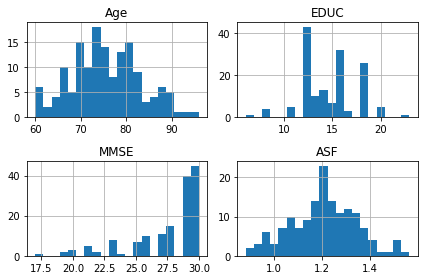

In [3]:
import matplotlib.pyplot as plt
oasis_df[oasis_df['Visit'] == 1].hist(['Age', 'EDUC', 'MMSE', 'ASF'],bins = 20);
plt.tight_layout()

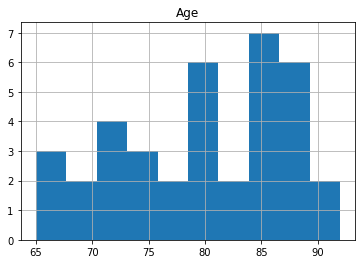

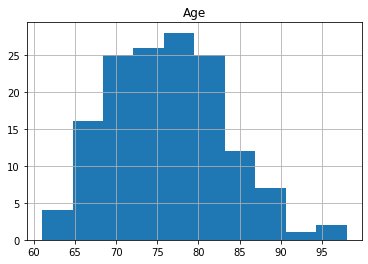

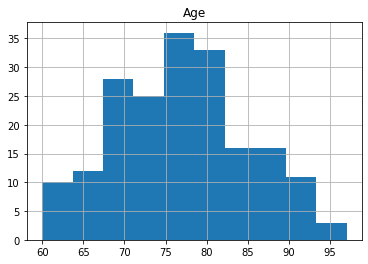

In [4]:
# one plot with three lines for each of the three groups 
oasis_df.groupby('Group').hist('Age');

The reason for the split for participants with 1 visit is to make sure that there is data for all participants as only 58 participants had 3 scans. The number of participants decreases significantly with 6 people having 5 visits.

In [5]:
oasis_df[oasis_df['Visit'] == 3].count()

Subject_ID    58
Group         58
Visit         58
M/F           58
Age           58
EDUC          58
SES           55
MMSE          57
CDR           58
eTIV          58
nWBV          58
ASF           58
dtype: int64

In [6]:
oasis_df[oasis_df['Visit'] == 5].count()

Subject_ID    6
Group         6
Visit         6
M/F           6
Age           6
EDUC          6
SES           6
MMSE          6
CDR           6
eTIV          6
nWBV          6
ASF           6
dtype: int64

The dummy coding here is necessary for us to run the ANOVA models as these are categorical. Also we want to remove the participants who already have dementia as we want to see what potentially affects whether someone develops dementia.

In [7]:
one_visit = oasis_df[oasis_df['Visit'] == 1] # subset of data 
dummies = pd.get_dummies(one_visit["Group"]) # dummy coding for group
one_visit = one_visit.merge(dummies, left_index=True, right_index=True).dropna()
one_visit = one_visit[ one_visit["Demented"] != 1 ] # removed participants who already have dementia
one_visit.head()

,Subject_ID,Group,Visit,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Converted,Demented,Nondemented
0,OAS2_0001,Nondemented,1,M,87,14,2.0,27.0,0.0,1987,0.696,0.883,0,0,1
5,OAS2_0004,Nondemented,1,F,88,18,3.0,28.0,0.0,1215,0.710,1.444,0,0,1
7,OAS2_0005,Nondemented,1,M,80,12,4.0,28.0,0.0,1689,0.712,1.039,0,0,1
13,OAS2_0008,Nondemented,1,F,93,14,2.0,30.0,0.0,1272,0.698,1.380,0,0,1
19,OAS2_0012,Nondemented,1,F,78,16,2.0,29.0,0.0,1333,0.748,1.316,0,0,1


In [8]:
one_visit.describe()

,Visit,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Converted,Demented,Nondemented
count,86.0,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.0,86.000000
mean,1.0,75.697674,15.162791,2.325581,29.220930,0.005814,1473.302326,0.744767,1.207535,0.162791,0.0,0.837209
std,0.0,8.125587,2.691426,1.067618,0.859564,0.053916,176.483165,0.037712,0.139402,0.371340,0.0,0.371340
min,1.0,60.000000,8.000000,1.000000,26.000000,0.000000,1123.000000,0.666000,0.883000,0.000000,0.0,0.000000
25%,1.0,69.000000,13.000000,1.250000,29.000000,0.000000,1347.250000,0.716500,1.106500,0.000000,0.0,1.000000
50%,1.0,76.000000,16.000000,2.000000,29.000000,0.000000,1442.000000,0.746500,1.217500,0.000000,0.0,1.000000
75%,1.0,81.000000,18.000000,3.000000,30.000000,0.000000,1586.000000,0.769000,1.302750,0.000000,0.0,1.000000
max,1.0,93.000000,23.000000,5.000000,30.000000,0.500000,1987.000000,0.837000,1.563000,1.000000,0.0,1.000000


### Questions

1. Which factors most effect whether a participant gets dementia?
2. Which factors affect participants' scores from baseline compared to their second visit? 

In order to answer these questions I have used an ANOVA from the statsmodels package. 

In [9]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

lm = ols('Converted ~ Age+EDUC+SES+MMSE+CDR+eTIV+nWBV+ASF', data=one_visit).fit()

table = sm.stats.anova_lm(lm, typ=2)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(table.sort_values("F", ascending=False))

,sum_sq,df,F,PR(>F)
SES,0.554050,1.0,4.274423,0.042050
CDR,0.496295,1.0,3.828854,0.054003
EDUC,0.173316,1.0,1.337110,0.251119
eTIV,0.169517,1.0,1.307803,0.256336
ASF,0.139126,1.0,1.073343,0.303434
Age,0.087177,1.0,0.672562,0.414691
MMSE,0.031221,1.0,0.240867,0.624977
nWBV,0.000661,1.0,0.005098,0.943264
Residual,9.980727,77.0,NaN,NaN


This ANOVA was comparing the simple effects of the variables on the 'Converted' group from participants' first visit to the hospital. The findings from this model, was a significant effect of socioeconomic status: F(1,77) = 4.27, p < .05.

Below the change between scores from baseline and the second visit were calculated. As expected, the education and socioeconomic status values did not change as they are fixed effects. 

In [10]:
both_visits = oasis_df[oasis_df['Visit'] <= 2].dropna()
both_visits = both_visits.groupby('Subject_ID').filter(lambda x: len(x) == 2)

both_visits = both_visits.sort_values(["Subject_ID", "Visit"])
both_visits_diff = both_visits.groupby(['Subject_ID'])[['Age', 'EDUC', 'SES', 'MMSE',
       'CDR', 'eTIV', 'nWBV', 'ASF']].diff().dropna()
both_visits = both_visits[["Subject_ID", "Group"]].merge(both_visits_diff, left_index=True, right_index=True)

dummies = pd.get_dummies(both_visits["Group"])
both_visits = both_visits.merge(dummies, left_index=True, right_index=True).dropna()

both_visits = both_visits[ both_visits["Demented"] != 1 ]

both_visits.head()

,Subject_ID,Group,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Converted,Demented,Nondemented
1,OAS2_0001,Nondemented,1.0,0.0,0.0,3.0,0.0,17.0,-0.015,-0.007,0,0,1
6,OAS2_0004,Nondemented,2.0,0.0,0.0,-1.0,0.0,-15.0,0.008,0.018,0,0,1
8,OAS2_0005,Nondemented,3.0,0.0,0.0,1.0,0.5,12.0,-0.001,-0.007,0,0,1
14,OAS2_0008,Nondemented,2.0,0.0,0.0,-1.0,0.0,-15.0,0.005,0.016,0,0,1
20,OAS2_0012,Nondemented,2.0,0.0,0.0,0.0,0.0,-10.0,-0.010,0.010,0,0,1


In [11]:
both_visits.describe()

,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Converted,Demented,Nondemented
count,82.000000,82.0,82.0,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.0,82.000000
mean,2.109756,0.0,0.0,-0.256098,0.048780,5.634146,-0.008354,-0.003902,0.146341,0.0,0.853659
std,0.916328,0.0,0.0,1.340821,0.168687,24.268311,0.010230,0.018681,0.355623,0.0,0.355623
min,0.000000,0.0,0.0,-5.000000,-0.500000,-64.000000,-0.037000,-0.097000,0.000000,0.0,0.000000
25%,2.000000,0.0,0.0,-1.000000,0.000000,-8.500000,-0.016000,-0.012000,0.000000,0.0,1.000000
50%,2.000000,0.0,0.0,0.000000,0.000000,3.000000,-0.007000,-0.004000,0.000000,0.0,1.000000
75%,2.000000,0.0,0.0,0.750000,0.000000,14.750000,-0.001000,0.006750,0.000000,0.0,1.000000
max,5.000000,0.0,0.0,3.000000,0.500000,123.000000,0.015000,0.052000,1.000000,0.0,1.000000


An analysis on the change in values from visit 1 and visit 2 were compared using ANOVA. The model is very simple looking at the effect of the selected variables on the 'Converted' group. The ANOVA table shows us that the only significant effect is the MMSE : F(1,76) = 9.23, p < .05. As this test is used widely for the diagnosis of Alzheimer's disease and Mild Cognitive Impairment - I can't say that I am surprised.

In [12]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

lm = ols('Converted ~ Age+EDUC+SES+MMSE+eTIV+nWBV+ASF', data=both_visits).fit()

table = sm.stats.anova_lm(lm, typ=2)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    display(table.sort_values("F", ascending=False))

,sum_sq,df,F,PR(>F)
MMSE,1.034612,1.0,9.229063,0.003264
Age,0.356191,1.0,3.177338,0.078660
nWBV,0.011161,1.0,0.099564,0.753219
eTIV,0.001202,1.0,0.010724,0.917795
EDUC,0.000866,1.0,0.007729,0.930176
ASF,0.000820,1.0,0.007311,0.932086
SES,0.000052,1.0,0.000463,0.982891
Residual,8.519879,76.0,NaN,NaN


I do want to emphasize that this is a mere exercise for me to test out using ANOVAs in Python and I am not claiming that my results can be used as any kind of 'proof' of what causes dementia. Especially as the data is not as large as other population datasets with thousands of participants. I also want to say that this project does not end here and I will be making a follow-up post using other methods e.g. Linear Mixed-Effects Model. Furthermore I would like to explore more questions in relation to this dataset other than the two mentioned in this post.